#### Import Libraries

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

#### Download Data

In [2]:
df = pd.read_csv('http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv') #save as dataframe

In [3]:
gamma = [2**i for i in range(-40,-25)] #given gamma
sigma = [2**i for i in list(np.arange(7, 13.5, 0.5))] #given sigma

In [4]:
train_size = round(2*len(df)/3) # size of training data=2/3
test_size = len(df)-train_size # size of test data=1/3
n = len(df) #total rows in data

#### Below function takes input as dataframe and train size and randomly splits the rows in 2/3 and 1/3 parts

In [5]:
def sample_gen(data,train_size): #input data and train size
    np.random.seed(20) #for reproducability of results

    n = len(data) # number of rows
    ind = list(range(0,n)) #generate list of numbers in range n
    train_ind = random.sample(range(0,n),train_size) #randomly select numbers in above range and generate numbers=train size
    test_ind = [x for x in ind if x not in train_ind] # remaining indices are used for test
    return data.iloc[train_ind,:] , data.iloc[test_ind, : ] #generate train and test data

In [6]:
train , test = sample_gen(df,train_size) # use the function to generate train and test data


In [7]:
def gaussian_kernel_matrix_new(X,X_test, sigma): # function for gaussian kernel
    distances = np.sum((X[:, np.newaxis] - X_test) ** 2, axis=-1) #calculate euclidean distances
    kernel_matrix = np.exp(-distances / (2 * sigma ** 2)) #final kernel matrix
 
    return kernel_matrix #output kernel matrix

In [8]:
f  = np.array_split(train, 5) #split the training data in 5 sections


In [9]:
np.random.seed(20)

e=[] # this will be used to store MSE
data =[] #final data along with gamma , sigma nad MSE
for ind1,g in enumerate(gamma): #iterate through all values of gamma
    for ind2 , s in enumerate(sigma): #iterate through all values of sigma
        for i in range(5): # for 5 folds
            train = f.copy()  # make a copy of f calculated above and save it as train
            test = f[i] # save 1 fold in test
            del train[i] # delete that train 
            train = pd.concat(train, sort=False) # this train data will carry 4 parts
            x = train.iloc[:,:-1] #select all columns except last
            y = train.iloc[:,[-1]] #select last column
            k = gaussian_kernel_matrix_new(np.array(x),np.array(x),s ) #calculate kernel matrix for training data
            I = np.identity(x.shape[0]) # Identity matrix 
            alpha = np.matmul(np.linalg.inv((k+g*x.shape[0]*I)) , np.array(y)) # calculate weights
            x_test = test.iloc[:,:-1] #test data
            test['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x_test), s)).transpose() #prediction
            e.append(((test['pred']-test['MEDV'])**2).mean()) #Mean squared error
            test.drop('pred', axis=1,inplace=True) # drop the created prediction for next iteration
        data.append((ind1,g,ind2,s,np.mean(e))) #append the data
        e=[]

In [10]:
data = pd.DataFrame(data,columns=['gamma_index','gamma','sigma_index','sigma','mean_serror']) # generates datafram


In [11]:
params = data[data['mean_serror']==data['mean_serror'].min()] #this will show gamma and sigma values for minimum MSE
params

,gamma_index,gamma,sigma_index,sigma,mean_serror
185,14,1.490116e-08,3,362.038672,10.918188


In [12]:
best_gamma , best_sigma = params.iloc[0,1] , params.iloc[0,3] #save best params
best_gamma ,best_sigma

(1.4901161193847656e-08, 362.03867196751236)

In [13]:
np.random.seed(20)

train_f , test_f  = sample_gen(df,train_size) #split the training data in 5 sections



In [14]:
np.random.seed(20)

train_f = train_f.copy() #train data
test_f = test_f.copy() #test data
x = train_f.iloc[:,:-1] #select all columns except last
y = train_f.iloc[:,[-1]] #select last column
k = gaussian_kernel_matrix_new(np.array(x),np.array(x),best_sigma ) #calculate kernel matrix for training data
I = np.identity(x.shape[0]) # Identity matrix 
alpha = np.matmul(np.linalg.inv((k+best_gamma*x.shape[0]*I)) , np.array(y))
train_f['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x), best_sigma)).transpose() #prediction
x_test = test_f.iloc[:,:-1] # test data
test_f['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x_test), best_sigma)).transpose() #predicted y values
print(((test_f['pred']-test_f['MEDV'])**2).mean()) #print MSE of test data
print(((train_f['pred']-train_f['MEDV'])**2).mean()) #print MSE of train data


11.81156610848566
8.210167966629806


In [15]:
print(((test_f['pred']-test_f['MEDV'])**2).mean().round(2))
print(((train_f['pred']-train_f['MEDV'])**2).mean().round(2))

11.81
8.21


#### 3D plot of MSE , gamma and sigma

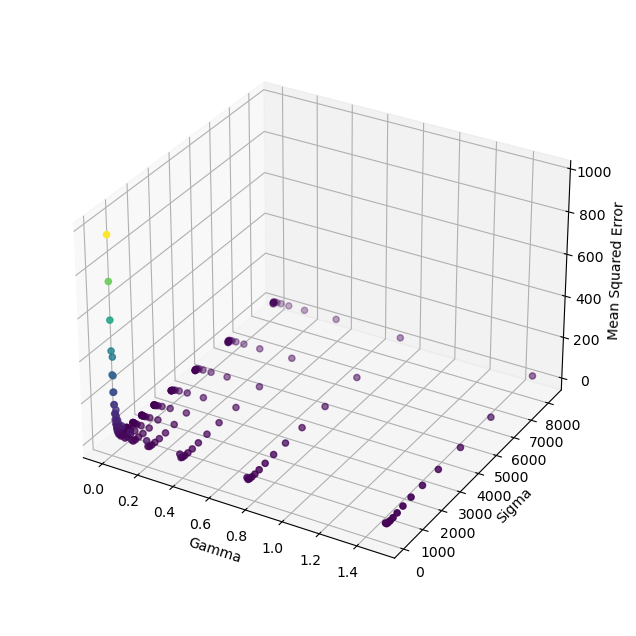

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.scatter(data['gamma'], data['sigma'], data[['mean_serror']],c=(data['mean_serror']))
ax.set_xlabel('Gamma')
ax.set_ylabel('Sigma')
ax.set_zlabel('Mean Squared Error')
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.show()
fig.savefig('q5b.png')

In [17]:
np.random.seed(20)
# Repeat over 20 iterations and calculate mean of MSE
train , test = sample_gen(df,train_size) 
mse_train =[]
mse_test =[]
for i in range(0,20):
    train , test = sample_gen(df,train_size) 
    y_train = train[['MEDV']].copy()
    y_test  = test[['MEDV']].copy()
    X = np.array([np.ones(train_size)])
    X = pd.DataFrame(X.transpose())

    X = np.array(X.values)
    Y = np.array(y_train.values)
    weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y))



    X_test = np.array([np.ones(test_size)]).transpose()
    y_train[['pred']]= np.matmul((X),np.array([weight[0]]).transpose() )
    y_test[['pred']]= np.matmul((X_test),np.array([weight[0]]).transpose() )
  

    mse_train.append(np.mean((y_train['MEDV']-y_train['pred'])**2))
    mse_test.append(np.mean((y_test['MEDV']-y_test['pred'])**2))

In [18]:
data = {
  "Model": ['Naive Regression'],
  "MSE train mean": [np.mean(mse_train)],
  "MSE train standard deviation": [np.std(mse_train)],
  "MSE test mean": [np.mean(mse_test)],
  "MSE test standard deviation": [np.std(mse_test)]
}
results = pd.DataFrame(data)
results # result of naive regression with MSE of train and test data

,Model,MSE train mean,MSE train standard deviation,MSE test mean,MSE test standard deviation
0,Naive Regression,85.803447,4.20143,82.026528,8.439534


In [19]:
np.random.seed(20)

features = list(df.columns[:-1])
train_size = round(2*len(df)/3)
test_size = len(df)-train_size
n = len(df)
for index,feature in enumerate(features):
    mse_train =[]
    mse_test =[]
    train , test = sample_gen(df,train_size)
    for i in range(20):
        train , test = sample_gen(df,train_size)
        X_train = train[[feature]]
        X_test =  test[[feature]]
        X_train.insert(loc = 0,column = 'bias',value = 1)
        X_test.insert(loc = 0,column = 'bias',value = 1)
        y_train = train[['MEDV']].copy()
        y_test  = test[['MEDV']].copy()
        X = X_train.values
        Y = y_train.values
        
        weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y)) 

        y_train[['pred']] = np.matmul(X,np.array([weight[0:2]]).transpose() ).reshape(train_size,1)
        y_test[['pred']] = np.matmul(X_test.values,np.array([weight[0:2]]).transpose() ).reshape(test_size,1)
        mse_train.append(np.mean((y_train['MEDV']-y_train['pred'])**2))
        mse_test.append(np.mean((y_test['MEDV']-y_test['pred'])**2))
    row = pd.Series(['Linear Regression Attribute '+str(index+1)+' ('+feature+')', np.mean(mse_train), np.std(mse_train), np.mean(mse_test), np.std(mse_test)], index=results.columns) 
    new_df = pd.DataFrame([row])
    results = pd.concat([results, new_df], axis=0, ignore_index=True)
results # results considering 1 feature and 1 bias at time

,Model,MSE train mean,MSE train standard deviation,MSE test mean,MSE test standard deviation
0,Naive Regression,85.803447,4.201430,82.026528,8.439534
1,Linear Regression Attribute 1 (CRIM),70.849950,6.088787,74.554797,12.477007
2,Linear Regression Attribute 2 ( ZN ),74.810625,4.609448,71.240958,9.318708
3,Linear Regression Attribute 3 (INDUS ),65.712078,4.086862,62.981997,8.079577
4,Linear Regression Attribute 4 (CHAS),82.103958,5.926955,81.916272,11.695965
5,Linear Regression Attribute 5 (NOX),68.568049,4.416295,70.085327,8.904081
6,Linear Regression Attribute 6 (RM),43.689517,3.063822,43.987736,6.138595
7,Linear Regression Attribute 7 (AGE),72.846817,3.523236,71.903603,7.073681
8,Linear Regression Attribute 8 (DIS),78.122490,4.753399,81.458470,9.544602
9,Linear Regression Attribute 9 (RAD),73.936150,4.167147,68.742353,8.318841


In [20]:
np.random.seed(20)

for i in range(20):
    train , test = sample_gen(df,train_size)
    X_train = train[features]
    X_test =  test[features]
    X_train.insert(loc = 0,column = 'bias',value = 1)
    X_test.insert(loc = 0,column = 'bias',value = 1)
    y_train = train[['MEDV']].copy()
    y_test  = test[['MEDV']].copy()
    X = X_train.values
    Y = y_train.values
        
    weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y)) 
    y_train[['pred']] = np.matmul(X,np.array([weight[0:14]]).transpose() ).reshape(train_size,1)
    y_test[['pred']] = np.matmul(X_test.values,np.array([weight[0:14]]).transpose() ).reshape(test_size,1)
    mse_train.append(np.mean((y_train['MEDV']-y_train['pred'])**2))
    mse_test.append(np.mean((y_test['MEDV']-y_test['pred'])**2))
row = pd.Series(['Linear Regression (All Attributes)', np.mean(mse_train), np.std(mse_train), np.mean(mse_test), np.std(mse_test)], index=results.columns) 
new_df = pd.DataFrame([row])
results = pd.concat([results, new_df], axis=0, ignore_index=True)
results # all features

,Model,MSE train mean,MSE train standard deviation,MSE test mean,MSE test standard deviation
0,Naive Regression,85.803447,4.201430,82.026528,8.439534
1,Linear Regression Attribute 1 (CRIM),70.849950,6.088787,74.554797,12.477007
2,Linear Regression Attribute 2 ( ZN ),74.810625,4.609448,71.240958,9.318708
3,Linear Regression Attribute 3 (INDUS ),65.712078,4.086862,62.981997,8.079577
4,Linear Regression Attribute 4 (CHAS),82.103958,5.926955,81.916272,11.695965
5,Linear Regression Attribute 5 (NOX),68.568049,4.416295,70.085327,8.904081
6,Linear Regression Attribute 6 (RM),43.689517,3.063822,43.987736,6.138595
7,Linear Regression Attribute 7 (AGE),72.846817,3.523236,71.903603,7.073681
8,Linear Regression Attribute 8 (DIS),78.122490,4.753399,81.458470,9.544602
9,Linear Regression Attribute 9 (RAD),73.936150,4.167147,68.742353,8.318841


In [21]:
results.round(2).to_csv('Question5.csv', index=False)

In [22]:
np.random.seed(20)
# get top 20 pairs of sigma and gamma
data =[]
for run in range(20):
    e=[]
    train , test = sample_gen(df,train_size)
    f  = np.array_split(train, 5)
    for ind1,g in enumerate(gamma):
        for ind2 , s in enumerate(sigma):
            for i in range(5):
                train = f.copy() 
                test = f[i]
                del train[i]
                train = pd.concat(train, sort=False)
                x = train.iloc[:,:-1]
                y = train.iloc[:,[-1]]
                #print(x.shape,y.shape)
                k = gaussian_kernel_matrix_new(np.array(x),np.array(x),s )
                I = np.identity(x.shape[0])
                alpha = np.matmul(np.linalg.inv((k+g*x.shape[0]*I)) , np.array(y))
                x_test = test.iloc[:,:-1]
                test['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x_test), s)).transpose()
                e.append(((test['pred']-test['MEDV'])**2).mean())
                test.drop('pred', axis=1,inplace=True)
            data.append((run,ind1,g,ind2,s,np.mean(e)))
            e=[]

In [23]:
data_k = pd.DataFrame(data,columns=['run','gamma_index','gamma','sigma_index','sigma','MSE'])
best_ind = data_k.groupby('run')['MSE'].idxmin()

In [24]:
best = data_k.iloc[best_ind]

In [25]:
best = best.reset_index()

In [26]:
ker =[] # carry out Kernel regression on top 20
for index, row in best.iterrows():
    mse_train =[]
    mse_test =[]
    for run in range(20):
        #print(row['gamma'], row['sigma'])
        train_f , test_f  = sample_gen(df,train_size)
        train_f = train_f.copy()
        test_f = test_f.copy()
        x = train_f.iloc[:,:-1]
        y = train_f.iloc[:,[-1]]
        k = gaussian_kernel_matrix_new(np.array(x),np.array(x),row['sigma'] )
        I = np.identity(x.shape[0])
        alpha = np.matmul(np.linalg.inv((k+row['gamma']*x.shape[0]*I)) , np.array(y))
        train_f['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x), row['sigma'])).transpose()
        x_test = test_f.iloc[:,:-1]
        test_f['pred'] = np.matmul(alpha.transpose(),gaussian_kernel_matrix_new(np.array(x),np.array(x_test), row['sigma'])).transpose()
        #print(((test_f['pred']-test_f['MEDV'])**2).mean(),((train_f['pred']-train_f['MEDV'])**2).mean())
       # print(str(run)+'done')
        mse_train.append(np.mean((train_f['pred']-train_f['MEDV'])**2))
        mse_test.append(np.mean((test_f['pred']-test_f['MEDV'])**2))
    #print(len(mse_test))
    ker.append(['Gamma:' +str(row['gamma']) + ' Sigma:' + str(row['sigma']),np.mean(mse_train), np.std(mse_train), np.mean(mse_test), np.std(mse_test)])
    mse_train =[]
    mse_test =[] 

In [27]:
kernelregression = pd.DataFrame(ker, columns=['Kernel Regression Parameters','MSE Train Mean','MSE Train SD','MSE Test Mean','MSE Test SD'])

In [28]:
kernelregression.round(2).to_csv('Question5d.csv', index=False)

In [29]:
kernelregression

,Kernel Regression Parameters,MSE Train Mean,MSE Train SD,MSE Test Mean,MSE Test SD
0,Gamma:3.637978807091713e-12 Sigma:1448.1546878...,7.303106,1.057627,12.853645,3.791284
1,Gamma:9.313225746154785e-10 Sigma:724.07734393...,8.083282,0.750435,12.503176,2.095273
2,Gamma:5.820766091346741e-11 Sigma:512.0,5.769594,0.622365,12.732961,2.376919
3,Gamma:1.8189894035458565e-12 Sigma:1024.0,5.781728,0.815017,14.522036,4.550500
4,Gamma:4.656612873077393e-10 Sigma:1024.0,9.039827,0.612080,17.785067,23.498212
5,Gamma:9.094947017729282e-13 Sigma:1024.0,5.680734,0.826299,12.707984,3.101099
6,Gamma:9.094947017729282e-13 Sigma:5792.6187514...,9.992588,0.795442,12.820963,1.937689
7,Gamma:9.313225746154785e-10 Sigma:512.0,7.288629,0.497850,11.816619,0.918779
8,Gamma:7.450580596923828e-09 Sigma:362.03867196...,7.330904,0.685237,13.423295,3.342772
9,Gamma:9.313225746154785e-10 Sigma:724.07734393...,8.255557,0.902836,12.075326,2.295125
